Nama : Moh. sahal assahari

Kelas : TI22j

Sesi : 10

Nim : 20220040272

Matkul : Machine Learning

Dosen : Bu Ivana Lucia Kharisma, M.Kom

In [ ]:
%%capture
!pip install pyglet==1.5.1
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

: 

1. Kode di atas menginstal beberapa paket dan library yang diperlukan untuk membuat virtual display yang tidak terlihat (invisible) dengan ukuran 1400x900 piksel.

In [ ]:
%%capture
!pip install gym==0.24
!pip install pygame
!pip install numpy

!pip install imageio imageio_ffmpeg

: 

2. Perintah di atas digunakan untuk menginstal paket-paket Python "imageio" dan "imageio_ffmpeg" menggunakan pip, yang diperlukan untuk bekerja dengan citra dan video dalam Python.

In [ ]:
import numpy as np
import gym
import random
import time

3. Kode di atas mengimpor library numpy untuk operasi numerik, library gym untuk reinforcement learning environment, serta library random dan time untuk penggunaan fungsi-fungsi terkait randomization dan waktu.


In [ ]:
my_map = [
    "SFFFF",
    "FHFHF",
    "FFFHF",
    "HFFHF",
    "FFFGF"
]

env = gym.make('FrozenLake-v1', desc=my_map, is_slippery=False)
env.render()
env.reset()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

4. Kode di atas membuat lingkungan FrozenLake dengan peta kustom yang didefinisikan dalam variabel `my_map`, menonaktifkan efek licin pada lingkungan, merender lingkungan, dan mengatur ulang lingkungan untuk memulai episode baru.

In [ ]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print(f'action_space_size = {action_space_size}')
print(f'state_space_size = {state_space_size}')
print(f'q_table = \n{q_table}')

action_space_size = 4
state_space_size = 25
q_table = 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


5. Kode di atas menghitung ukuran ruang aksi dan ruang keadaan dari lingkungan, serta membuat tabel Q kosong dengan ukuran yang sesuai, kemudian mencetak nilai-nilai tersebut.

In [ ]:
# Training parameters
num_episodes = 1000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99

exploration_rate =1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.05

6. Kode di atas mendefinisikan parameter-parameter pelatihan seperti jumlah episode, maksimum langkah per episode, tingkat pembelajaran, tingkat diskon, tingkat eksplorasi awal, tingkat eksplorasi maksimum, tingkat eksplorasi minimum, dan tingkat penurunan eksplorasi.

In [ ]:
rewards_all_episodes = []

for episode in range(num_episodes):
  state = env.reset()
  state = 0
  done = False
  reward_current_episode = 0

  for step in range(max_steps_per_episode):
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
      action = np.argmax(q_table[state, :])
    else:
      action = env.action_space.sample()

    new_state, reward, done, info = env.step(action)
    delta_q = ( 1 - learning_rate)+  learning_rate*(reward + discount_rate*np.max(q_table[new_state, :]))

    print(f"We are on {episode} episode and {step} step")
    print(f"Delta Q = {delta_q}")
    print(f"Q_table[{state},{action}]_old = {q_table[state, action]}")

    q_table[state, action] = q_table[state, action]*(1 - learning_rate)+\
                            learning_rate*(reward+discount_rate*np.max(q_table[new_state, :]))
    print(f"Q_table[{state, action}]_new = {q_table[state, action]}")
    print(f"We are on {state} state")
    state = new_state
    print(f"And now we are on {state} state")
    reward_current_episode+= reward
    print(f"We get {reward} reward ")
    print(f"exploration_rate = {exploration_rate}\n")

    if done == True:
        break

exploration_rate = min_exploration_rate +\
                 (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
rewards_all_episodes.append(reward_current_episode)



Output streaming akan dipotong hingga 5000 baris terakhir.
We are on 10 state
And now we are on 15 state
We get 0.0 reward 
exploration_rate = 1

We are on 940 episode and 0 step
Delta Q = 0.901578435511469
Q_table[0,1]_old = 0.01525801408380424
Q_table[(0, 1)]_new = 0.01531064818689279
We are on 0 state
And now we are on 5 state
We get 0.0 reward 
exploration_rate = 1

We are on 940 episode and 1 step
Delta Q = 0.9016561008400492
Q_table[5,3]_old = 0.01594379304514116
Q_table[(5, 3)]_new = 0.016005514580676224
We are on 5 state
And now we are on 0 state
We get 0.0 reward 
exploration_rate = 1

We are on 940 episode and 2 step
Delta Q = 0.9016561008400492
Q_table[0,3]_old = 0.016407090346212627
Q_table[(0, 3)]_new = 0.016422482151640543
We are on 0 state
And now we are on 0 state
We get 0.0 reward 
exploration_rate = 1

We are on 940 episode and 3 step
Delta Q = 0.9016561008400492
Q_table[0,3]_old = 0.016422482151640543
Q_table[(0, 3)]_new = 0.016436334776525667
We are on 0 state
And n

7. Kode di atas mengiterasi melalui serangkaian episode, melakukan langkah-langkah dalam setiap episode, memperbarui nilai delta Q sesuai dengan aturan pembelajaran Q-learning, dan menyimpan total reward dari setiap episode.

In [ ]:
!pip install imageio imageio_ffmpeg

In [ ]:
import imageio

8. Python untuk menginstal paket imageio dan imageio_ffmpeg.

In [ ]:
def record_video(env, q_table, out_directory, fps=1):
  images = []
  done = False
  state = env.reset(seed=random.randint(0,500))
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(q_table[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

9. Fungsi `record_video` merekam video dari lingkungan permainan menggunakan tabel Q, dengan mengambil tindakan berdasarkan nilai maksimum dari tabel Q untuk setiap keadaan, dan menyimpan gambar dari setiap iterasi ke dalam daftar gambar.

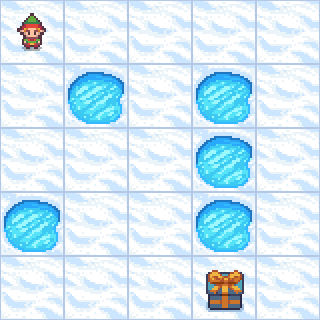

In [ ]:
video_path="/content/replay.gif"
video_fps=1
record_video(env, q_table, video_path, video_fps)

from IPython.display import Image
Image('./replay.gif')

10. Kode di atas merekam video dari lingkungan `env` menggunakan tabel Q `q_table`, kemudian menyimpannya sebagai file GIF dengan nama `replay.gif` pada path `/content/`. Video tersebut kemudian ditampilkan menggunakan IPython display.